In [23]:
import pandas as pd
import numpy as np
import matplotlib

In [24]:
varE = "Orificios Activos"

df = pd.DataFrame({varE:[0,1,2,3,4,5,6,7,8,9], "f":[12,35,22,16,13,10,9,7,5,1]})
df["F"] = df['f'].cumsum()
df["G"] = df.sort_values(by=varE,ascending=False)['f'].cumsum()
df["fr"] = round(df['f'] / df['f'].sum(),4)
df["Fr"] = df.sort_values(by=varE, ascending=True)['fr'].cumsum()
df["Gr"] = df.sort_values(by=varE, ascending=False)['fr'].cumsum()



In [25]:
print(f"El {round(df[df[varE] == 2]['Fr'].values[0]*100,4)}% de los arboles sera comercializable")

El 53.07% de los arboles sera comercializable


In [26]:
promedio = (df[df[varE] <= 2][varE] * df[df[varE] <= 2]
            ['f']).sum() / df[df[varE] <= 2]['f'].sum()

print(f"El promedio de los comercializables es {round(promedio,4)} {varE.lower()}")


El promedio de los comercializables es 1.1449 orificios activos


In [27]:
datosC = df[df[varE] <= 2]
promedioC = (datosC[varE] * datosC['f']).sum() / datosC['f'].sum()
numC = (datosC['f'] * ((datosC[varE] - promedioC)**2)).sum()
denC = datosC['f'].sum() - 1
varianzaC = numC  / denC
desviacionC = varianzaC ** 0.5

datosNC = df[df[varE] > 2]
promedioNC = (datosNC[varE] * datosNC['f']).sum() / datosNC['f'].sum()
numNC = (datosNC['f'] * ((datosNC[varE] - promedioNC)**2)).sum()
denNC = datosNC['f'].sum() - 1
varianzaNC = numNC / denNC
desviacionNC = varianzaNC ** 0.5

print(f"El coeficiente de variacion de los no comercializables es {round((desviacionNC / promedioNC) * 100,4)}%")


print(f"El coeficiente de variacion de los comercializables es {round(
      (desviacionC / promedioC) * 100,4)}%")

resultado = "Los arboles comercializables son mas homogenos" if desviacionC / promedioC < desviacionNC / promedioNC else "Los arboles no comercializables son mas homogeneos"


print(resultado)


El coeficiente de variacion de los no comercializables es 34.4813%
El coeficiente de variacion de los comercializables es 60.4293%
Los arboles no comercializables son mas homogeneos


In [28]:
print(f"El numero de orificios mas frecuente es {df.loc[df['f'].idxmax()][varE]}")

El numero de orificios mas frecuente es 1.0


In [29]:
mitad = df["f"].sum() / 2
mediana = 0

for index, row in df.iterrows():
  if row['F'] == mitad:
    mediana = (df.loc[index+1][varE] + row[varE]) / 2
    break
  elif row["F"] > mitad:
    mediana = row[varE]
    break

print(f"El numero de orificios mas frecuente es {mediana}")

El numero de orificios mas frecuente es 2.0


<Axes: xlabel='Orificios Activos'>

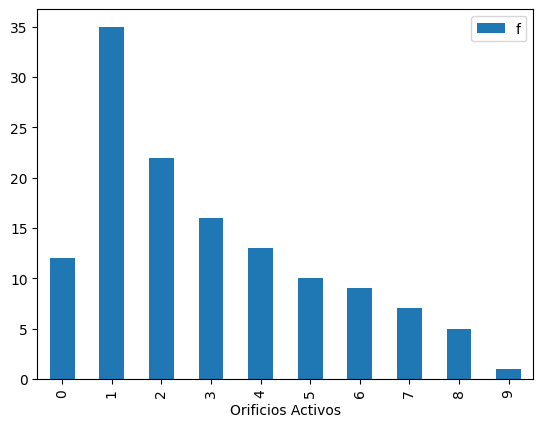

In [30]:
df.plot(kind="bar",x=varE,y='f')

<Axes: xlabel='Orificios Activos'>

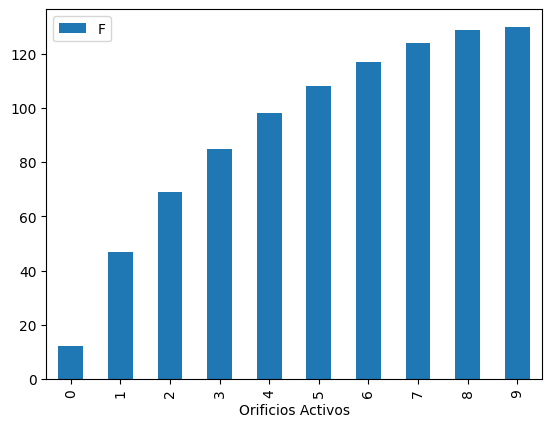

In [31]:
df.plot(kind="bar", x=varE,y='F')